# Visualize results from auction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
import seaborn as sns
import os

%matplotlib inline

logpath = os.path.join("logs", "auction_run_log" + ".csv")

names = ["bidder1", "bidder2", "bidder3"]
suffixes = ["", "", ""]

Qs = []
Qlogs = []
for name, suffix in zip(names, suffixes):
    Q = os.path.join("logs", name + suffix + ".txt")
    Qs.append(Q)
    Qlog = os.path.join("logs", name + "_Qlog" + suffix + ".csv")
    Qlogs.append(Qlog)

## Show Q development

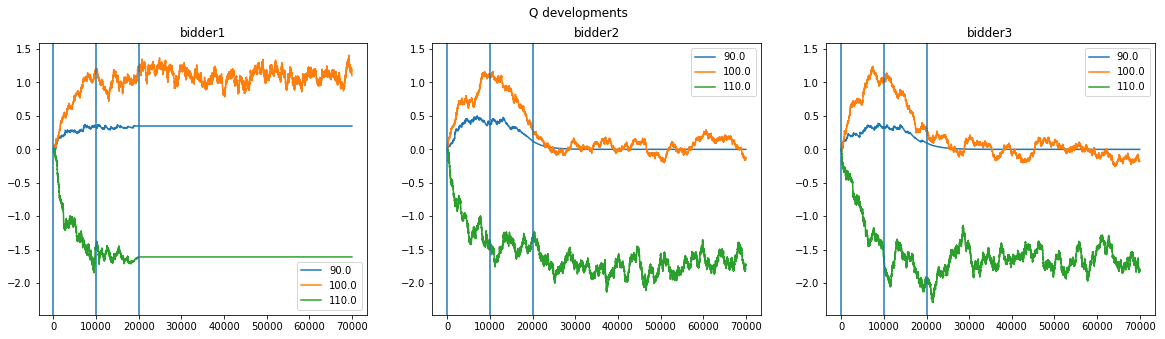

In [2]:
nbidders = len(names)
fig, ax = plt.subplots(figsize=(20,5))
title = "Q developments"
fig.suptitle(title, fontsize=12)
# fig.tight_layout()
ax1 = plt.subplot(111)
for ix, Qlog in enumerate(Qlogs):
    Qlogdata = pd.read_csv(Qlog,
                             index_col = 0,
                             header = 0,
                             skip_blank_lines = False)

    # Find first instance of new phase
    phases = Qlogdata["phase"].unique()
    ixfirsts = []
    for phase in phases:
        ixfirst = Qlogdata["phase"].eq(phase).idxmax()
        ixfirsts.append(ixfirst)
    Qlogdata.drop(["phase"], axis = 1, inplace = True)
    plt.subplot(1, nbidders, ix+1, sharex = ax1, sharey = ax1)
    plt.plot(Qlogdata)
    plt.legend(list(Qlogdata), loc='best')
    plt.title(names[ix])
    for ixfirstphase in ixfirsts:
        plt.axvline(x=ixfirstphase)

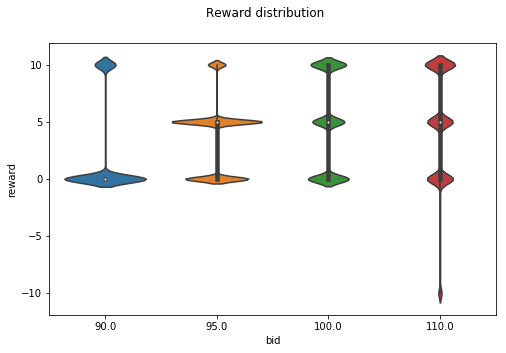

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
title = "Reward distribution"
fig.suptitle(title, fontsize=12)
logdata = pd.read_csv(logpath, skip_blank_lines=False)
ax = sns.violinplot(x="bid",
                    y="reward",
                    data=logdata,
                    inner="box")

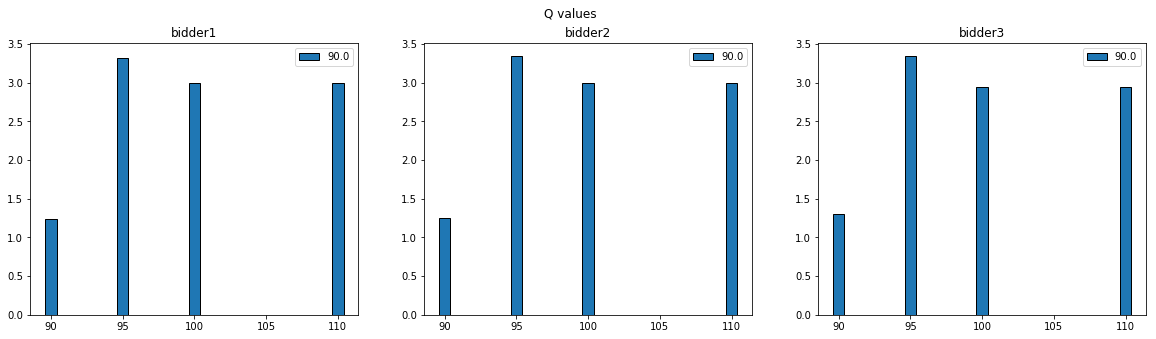

In [32]:
nbidders = len(names)
fig, ax = plt.subplots(figsize=(20,5))
title = "Q values"
fig.suptitle(title, fontsize=12)
ax1 = plt.subplot(111)

for ix, Qlog in enumerate(Qlogs):
    Qlogdata = pd.read_csv(Qlog,
                             index_col = 0,
                             header = 0,
                             skip_blank_lines = False)
    Qlogdata = Qlogdata.tail(1)
    Qlogdata.drop(["phase"], axis = 1, inplace = True)
    x = []
    y = []
    for name, series in Qlogdata.items():
        x.append(float(name))
        y.append(series.values)
    plt.subplot(1, nbidders, ix+1, sharex = ax1, sharey = ax1)
#     width = (max(bidder.bidspace)-min(bidder.bidspace))/(len(bidder.bidspace))
    bars = plt.bar(x, y, edgecolor='black')
    plt.legend(list(Qlogdata), loc='best')
    plt.title(names[ix])